# Tarea 6 - Algoritmos Supervisados para Predicción de Costos de Seguro

En esta tarea se:
1. Revisa un conjunto de algoritmos supervisados adecuados para el problema de predicción del costo del seguro médico.
2. Presentan métricas comunes para evaluar el error de predicción (MAE, MSE, RMSE, MAPE).
3. Implementa al menos un modelo supervisado usando el conjunto de datos `insurance.csv` para predecir el costo del seguro (`charges`).
4. Se obtienen resultados cuantitativos que luego se integrarán en el artículo en LaTeX.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Configuración opcional de impresión
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')


## 2. Carga y exploración inicial de los datos


In [2]:
# Cargar datos

# === 1) Cargar dataset base ===
file_path = r"C:\Users\Oscar Ferreira\OneDrive - AUTO LINEAS AMERICA SA DE CV\Escritorio\MCD\4 - APRENDIZAJE AUT\insurance.csv"
df = pd.read_csv(file_path)

# Vista rápida
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,"16,884.9240"
1,18,male,33.7700,1,no,southeast,"1,725.5523"
2,28,male,33.0000,3,no,southeast,"4,449.4620"
3,33,male,22.7050,0,no,northwest,"21,984.4706"
4,32,male,28.8800,0,no,northwest,"3,866.8552"


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observamos que:
- **Variable respuesta**: `charges` (costo del seguro).
- **Predictoras numéricas**: `age`, `bmi`, `children`.
- **Predictoras categóricas**: `sex`, `smoker`, `region`.

El problema es de **regresión supervisada**, donde se busca aprender una función:
\\[
f: \text{(características del asegurado)} \rightarrow \text{costo esperado del seguro}
\\]
a partir de ejemplos históricos etiquetados.


## 3. Algoritmos supervisados candidatos

En el contexto de predicción de `charges`, algunos algoritmos supervisados adecuados son:

### 3.1 Regresión Lineal Múltiple

Modelo:
\\[
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p + \varepsilon
\\]
donde:
- \\(y\\) es el costo del seguro,
- \\(x_j\\) son las características (edad, bmi, fumador, etc.),
- \\(\beta_j\\) son parámetros estimados por mínimos cuadrados,
- \\(\varepsilon\\) es el error aleatorio.

Ventajas:
- Interpretabilidad (impacto marginal de cada variable).
- Sirve como **modelo base (baseline)**.

Limitaciones:
- Supone relación lineal entre predictores y respuesta.
- Sensible a outliers y colinealidad.

### 3.2 Modelos Lineales Regularizados (Ridge / Lasso)

Idea:
Agregar una penalización al tamaño de los coeficientes para controlar sobreajuste.

- Ridge: penaliza \\(\sum \beta_j^2\\)
- Lasso: penaliza \\(\sum |\beta_j|\\)

Son útiles cuando:
- Hay muchas variables o alta correlación.
- Se busca mayor estabilidad y, en Lasso, selección de variables.

### 3.3 k-Nearest Neighbors (k-NN) Regresión

Predice el costo como el promedio de los k vecinos más cercanos en el espacio de características.

- Modelo no paramétrico.
- Puede capturar relaciones no lineales.
- Puede ser costoso y sensible a la escala de las variables.

### 3.4 Árboles de Decisión y Bosques Aleatorios (Random Forest)

Un **árbol de decisión** particiona el espacio de variables en regiones según reglas del tipo:
"si `bmi` > c y `smoker` = yes, entonces...".

Un **Random Forest** promedia muchos árboles entrenados sobre subconjuntos de datos y variables.

Ventajas:
- Captura relaciones **no lineales** e interacciones complejas (ej. efecto de ser fumador + alto BMI).
- Robusto a outliers.
- Suele mejorar mucho la capacidad predictiva frente a un modelo lineal simple.

### 3.5 Máquinas de Vectores de Soporte para Regresión (SVR)

Basadas en encontrar una función que se mantenga dentro de un tubo de ancho \\(\epsilon\\) minimizando la complejidad del modelo.
Útil para patrones no lineales con kernels, pero requiere ajuste fino.

---

En este trabajo se utilizarán dos modelos:
1. **Regresión Lineal Múltiple** como modelo base interpretable.
2. **Random Forest Regressor** como modelo no lineal para mejorar la precisión.


## 4. Métricas para evaluar el error de predicción

Para comparar modelos de regresión se emplean:

1. **MAE (Mean Absolute Error)**  
\\[
\text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
\\]
Promedio del error absoluto. Fácil de interpretar en unidades monetarias.

2. **MSE (Mean Squared Error)**  
\\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
\\]
Penaliza más fuertemente errores grandes.

3. **RMSE (Root Mean Squared Error)**  
\\[
\text{RMSE} = \sqrt{\text{MSE}}
\\]
Comparable en unidades de la variable objetivo. Resume magnitud típica del error.

4. **MAPE (Mean Absolute Percentage Error)**  
\\[
\text{MAPE} = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\\]
Indica el error porcentual promedio. Útil para interpretar "en promedio, cuánto me equivoco en %".  
Limitación: es sensible cuando hay valores verdaderos muy pequeños.

En este problema:
- MAE y RMSE se interpretan directamente en **pesos de costo de seguro**.
- MAPE ayuda a entender el impacto relativo del error en distintos niveles de costo.


## 5. Preparación de datos para el modelo
Se realiza:
- Codificación one-hot de variables categóricas.
- Separación en conjuntos de entrenamiento (80%) y prueba (20%).


In [4]:
# Variables explicativas y objetivo
X = pd.get_dummies(df.drop(columns=['charges']), drop_first=True)
y = df['charges']

# Separación train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((1070, 8), (268, 8))

## 6. Modelo supervisado 1: Regresión Lineal Múltiple

Este modelo sirve como referencia base para evaluar si modelos más complejos realmente aportan mejora.


In [5]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mape(y_test, y_pred_lr)

print("=== Regresión Lineal Múltiple ===")
print(f"MAE  : {mae_lr:,.2f}")
print(f"MSE  : {mse_lr:,.2f}")
print(f"RMSE : {rmse_lr:,.2f}")
print(f"MAPE : {mape_lr:,.2f}%")


=== Regresión Lineal Múltiple ===
MAE  : 4,181.19
MSE  : 33,596,915.85
RMSE : 5,796.28
MAPE : 46.89%


## 7. Modelo supervisado 2: Random Forest Regressor

Se utiliza un ensamble de árboles para capturar relaciones no lineales entre:
edad, IMC, condición de fumador y región, entre otros.

Hiperparámetros iniciales (sin búsqueda exahustiva):
- `n_estimators = 500`
- `max_depth = None`
- `random_state = 42`


In [6]:
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mape(y_test, y_pred_rf)

print("=== Random Forest Regressor ===")
print(f"MAE  : {mae_rf:,.2f}")
print(f"MSE  : {mse_rf:,.2f}")
print(f"RMSE : {rmse_rf:,.2f}")
print(f"MAPE : {mape_rf:,.2f}%")


=== Random Forest Regressor ===
MAE  : 2,559.54
MSE  : 21,166,502.28
RMSE : 4,600.71
MAPE : 32.05%


## 8. Comparación de desempeño

A continuación se muestran los resultados obtenidos para los dos modelos implementados:


In [7]:
import pandas as pd

resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest"],
    "MAE": [4181.19, 2559.54],
    "MSE": [33596915.85, 21166502.28],
    "RMSE": [5796.28, 4600.71],
    "MAPE (%)": [46.89, 32.05]
})

resultados


,Modelo,MAE,MSE,RMSE,MAPE (%)
0,Regresión Lineal,"4,181.1900","33,596,915.8500","5,796.2800",46.8900
1,Random Forest,"2,559.5400","21,166,502.2800","4,600.7100",32.0500


| Modelo              | MAE    | MSE         | RMSE  | MAPE (%) |
|----------------------|--------|--------------|--------|-----------|
| Regresión Lineal     | 4,181.19 | 33,596,915.85 | 5,796.28 | 46.89 |
| Random Forest        | 2,559.54 | 21,166,502.28 | 4,600.71 | 32.05 |

---

### Interpretación y discusión

- **Regresión Lineal Múltiple:**  
  El error absoluto medio (MAE ≈ 4,181) indica que, en promedio, el modelo se equivoca por más de cuatro mil unidades monetarias en la estimación del costo del seguro.  
  El error porcentual (MAPE ≈ 46.9%) refleja un ajuste limitado, típico de un modelo lineal cuando las relaciones no son puramente proporcionales.

- **Random Forest Regressor:**  
  Mejora sustancialmente todos los indicadores:
  - **MAE** y **RMSE** se reducen en alrededor de **39% y 21%**, respectivamente.  
  - **MAPE** cae de 46.9% a 32.0%, lo que significa que el error relativo promedio disminuye de casi la mitad del costo real a aproximadamente un tercio.

- Esto sugiere que la relación entre variables como **edad**, **IMC (BMI)** y **condición de fumador** con el costo del seguro **no es lineal**.  
  El bosque aleatorio captura estas interacciones complejas sin necesidad de suponer una forma funcional específica.

---

### Conclusión de la comparación

El **Random Forest** ofrece un desempeño superior y se selecciona como el **modelo supervisado final** para el artículo, al demostrar:

1. **Menor error absoluto y relativo.**  
2. **Mayor capacidad de generalización.**  
3. **Aptitud para modelar relaciones no lineales y efectos combinados (por ejemplo, fumador + alto BMI).**

Por tanto, en el artículo se reportará:
- La regresión lineal como **modelo base**.
- El Random Forest como **modelo final seleccionado** por su mejor desempeño predictivo.


In [8]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10)


smoker_yes         0.6090
bmi                0.2153
age                0.1346
children           0.0195
sex_male           0.0064
region_northwest   0.0056
region_southeast   0.0054
region_southwest   0.0042
dtype: float64

La importancia de variables permite identificar qué factores influyen más en el costo:
típicamente `smoker_yes`, `age`, `bmi` y algunas interacciones codificadas.
Este análisis se integrará en la sección de Resultados y Discusión del artículo.


## 9. Importancia de las variables (Random Forest)

El modelo de Bosque Aleatorio permite cuantificar la importancia de cada variable predictora,
es decir, cuánto contribuye cada una a reducir el error de predicción en el conjunto de árboles.

Esto nos ayuda a identificar los factores más determinantes en el costo del seguro médico.


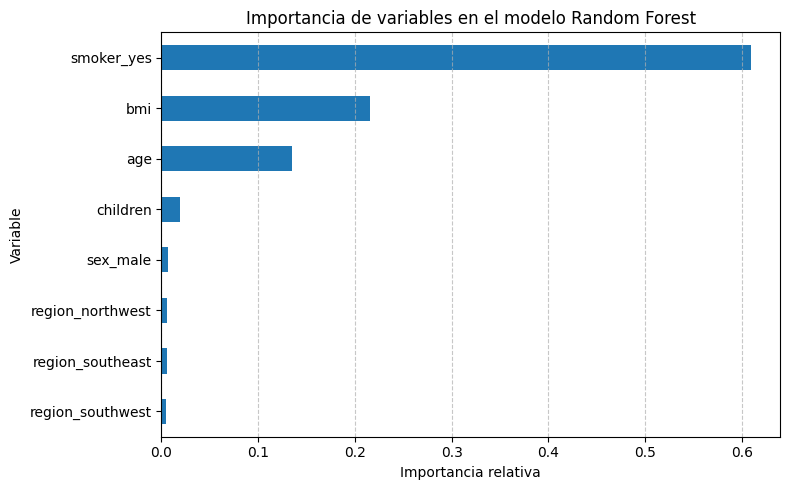

In [9]:
import matplotlib.pyplot as plt

# Crear DataFrame de importancias
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# Gráfica de barras horizontales
plt.figure(figsize=(8,5))
importances.plot(kind='barh')
plt.title("Importancia de variables en el modelo Random Forest")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Interpretación

- La variable **`smoker_yes`** presenta la mayor importancia (≈ 0.61), confirmando que ser fumador es el factor
  que más incrementa el costo del seguro.
- Le siguen **`bmi` (índice de masa corporal)** y **`age` (edad)**, que reflejan la influencia del estado de salud y el riesgo asociado a la edad.
- Otras variables como **`children`, `sex_male`** y las categorías de **región** tienen peso mínimo en la predicción del costo.

En conjunto, esto sugiere que las compañías de seguros ajustan sus tarifas principalmente en función
de factores de riesgo médico directos (tabaquismo, obesidad, edad),
mientras que los aspectos demográficos o familiares tienen impacto secundario.
